In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Perrin Freres monthly champagne sales millions.csv")

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [5]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
df.columns=["month","Sales"]
df.head()

,month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
df.drop(105,axis=0,inplace=True)

In [8]:
df.drop(106,axis=0,inplace=True)

In [9]:
df.tail()

,month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [10]:
df["month"]=pd.to_datetime(df["month"])

In [11]:
df.head()

,month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [12]:
df.set_index("month",inplace=True)

In [13]:
df.head()

,Sales
month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,105.0,4761.152381,2553.502601,1413.0,3113.0,4217.0,5221.0,13916.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


<AxesSubplot:xlabel='month'>

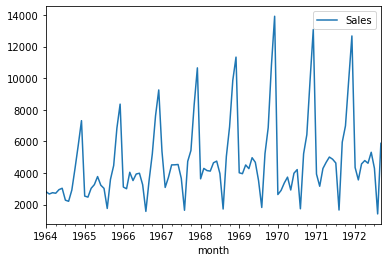

In [16]:
df.plot()

In [17]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

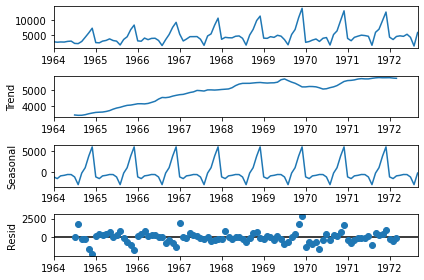

In [18]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

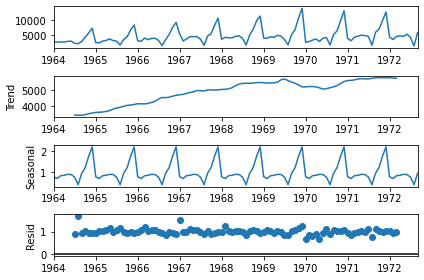

In [19]:
decomposition = seasonal_decompose(df,model="multiplicative")
decomposition.plot();

In [20]:
from statsmodels.tsa.stattools import adfuller

# Ho= Non stationary
H1=Stationary

In [21]:
test_result=adfuller(df["Sales"])

In [22]:
def adfuller_test(Sales):
    result=adfuller(Sales)
    Labels=["ADF Test Statatic","P-value","#lags used","No of observations used"]
    for value,Labels in zip(result,Labels):
        print (Labels+ ":"+str(value))
        if result[1]<=0.05:
            print("Reject Null Hypothesis, Time Series is Stionary")
        else:
            print("Time seris is non stationay")

In [23]:
adfuller_test(df["Sales"])

ADF Test Statatic:-1.8335930563276297
Time seris is non stationay
P-value:0.3639157716602417
Time seris is non stationay
#lags used:11
Time seris is non stationay
No of observations used:93
Time seris is non stationay


# Split the Data

In [24]:
df.index.year.unique()

Int64Index([1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972], dtype='int64', name='month')

In [25]:
train=df[df.index<="1970"]
test=df[df.index>"1970"]

In [26]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -0.730
DF test p-value is 0.9711182696090547
Number of lags used 12


In [27]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.766
DF test p-value is 1.232790818136427e-12
Number of lags used 11


p-value is less than 0.05 so we reject Null hypothesis , hence the Time series become stationary.

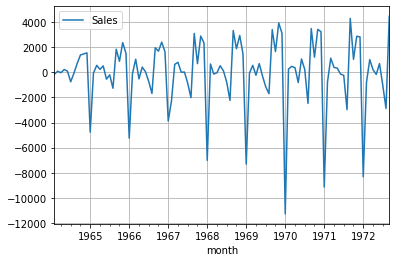

In [28]:
df.diff().dropna().plot(grid=True);

# AutoRegressive Model


In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

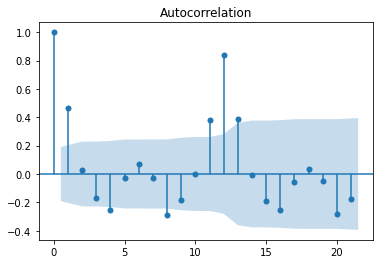

In [30]:
plot_acf(df,alpha=0.05);

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


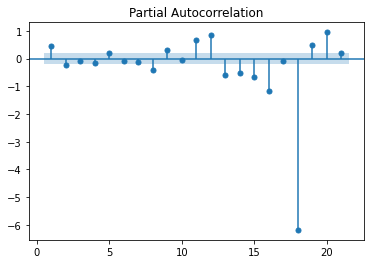

In [31]:
plot_pacf(df,zero=False,alpha=0.05);

In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
import itertools
p = q = range(0, 2)
d= range(0,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 0, 0)
Model: (0, 0, 1)
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 1, 0)
Model: (1, 1, 1)


In [34]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [35]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 0, 0) - AIC:1350.1562105027951
ARIMA(0, 0, 1) - AIC:1324.11573096242
ARIMA(0, 1, 0) - AIC:1332.803142534537
ARIMA(0, 1, 1) - AIC:1330.9737886532228
ARIMA(1, 0, 0) - AIC:1333.1983082820666
ARIMA(1, 0, 1) - AIC:1325.501175748558
ARIMA(1, 1, 0) - AIC:1334.5204814906942
ARIMA(1, 1, 1) - AIC:1318.9420488042451


In [36]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
7,"(1, 1, 1)",1318.942049
1,"(0, 0, 1)",1324.115731
5,"(1, 0, 1)",1325.501176
3,"(0, 1, 1)",1330.973789
2,"(0, 1, 0)",1332.803143


In [37]:
auto_ARIMA = ARIMA(train, order=(1,1,1))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   73
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -656.471
Date:                Mon, 16 May 2022   AIC                           1318.942
Time:                        21:21:07   BIC                           1325.772
Sample:                    01-01-1964   HQIC                          1321.661
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4533      0.188      2.410      0.016       0.085       0.822
ma.L1         -0.9491      0.109     -8.706      0.000      -1.163      -0.735
sigma2      4.775e+06   6.42e+05      7.440      0.0

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [42]:
import itertools
p = q = range(0,2)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)


In [43]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [44]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1315.3228752485954
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1057.001738549921
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1000.2892052378714
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:968.3500284314472
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1294.8001309474105


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1028.106956560137
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:959.3656831554895
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:913.1509872612419
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1317.0262156561575
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1058.2034401296003
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:965.1531105855369
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:944.7965087404357
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1284.8382990061773
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1025.124108433994
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:936.8755084985362
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:912.8275981785514


In [45]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
15,"(1, 1, 1)","(1, 0, 1, 12)",912.827598
7,"(0, 1, 1)","(1, 0, 1, 12)",913.150987
14,"(1, 1, 1)","(1, 0, 0, 12)",936.875508
11,"(1, 1, 0)","(1, 0, 1, 12)",944.796509
6,"(0, 1, 1)","(1, 0, 0, 12)",959.365683


In [56]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sales'],
                                order=(1,1,1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -718.102
Date:                            Mon, 16 May 2022   AIC                           1446.204
Time:                                    21:28:21   BIC                           1458.703
Sample:                                01-01-1964   HQIC                          1451.244
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2081      0.102      2.038      0.042       0.008       0.408
ma.L1         -1.1211      0.080   

In [59]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=20)

In [60]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
1972-10-01,7427.378334,673.052744,6108.219196,8746.537471
1972-11-01,11236.537366,705.893786,9853.010968,12620.063764
1972-12-01,14573.104526,715.526621,13170.698120,15975.510932
1973-01-01,4169.019223,722.082225,2753.764068,5584.274379
1973-02-01,3533.638902,728.031647,2106.723095,4960.554709


In [61]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=20)

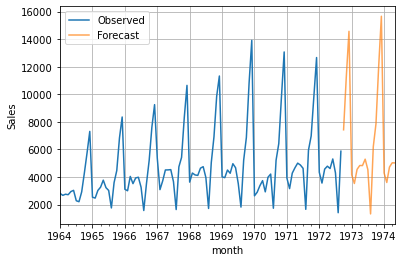

In [62]:
axis = df['Sales'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('month')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid();